## Libraries

In [1]:
# Import Libraries
# =========================================================

# import numpy and pandas
import numpy as np
import pandas as pd

# import libraries for plotting
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import matplotlib.font_manager
# import plotly.express as px
# from plotly.subplots import make_subplots
# import plotly.graph_objects as go

# Configuration of pandas
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:,.2f}'.format

# Configuration of matplotlib
# %matplotlib inline 
plt.rcParams['savefig.bbox'] = "tight"
# plt.style.use('ggplot')



# import sklear for preprocessing functions
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

## 1. EDA

In [11]:
df_comm_act = pd.read_csv("data/commercial_activity_df.csv")
df_prod = pd.read_csv("data/products_df.csv")
df_socio_dem = pd.read_csv("data/sociodemographic_df.csv")

display(df_comm_act.shape)
display(df_comm_act.head())
display(df_prod.shape)
display(df_prod.head())
display(df_socio_dem.shape)
display(df_socio_dem.head())

(5962924, 7)

,Unnamed: 0,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,0,1375586,2018-01-28,2018-01-12,KHL,1.00,02 - PARTICULARES
1,1,1050611,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
2,2,1050612,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
3,3,1050613,2018-01-28,2015-08-10,KHD,0.00,03 - UNIVERSITARIO
4,4,1050614,2018-01-28,2015-08-10,KHE,1.00,03 - UNIVERSITARIO


(5962924, 18)

,Unnamed: 0,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
2,2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
3,3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1


(5962924, 9)

,Unnamed: 0,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,0,1375586,2018-01-28,ES,29.00,H,35,N,"87,218.10"
1,1,1050611,2018-01-28,ES,13.00,V,23,N,"35,548.74"
2,2,1050612,2018-01-28,ES,13.00,V,23,N,"122,179.11"
3,3,1050613,2018-01-28,ES,50.00,H,22,N,"119,775.54"
4,4,1050614,2018-01-28,ES,50.00,V,23,N,NaN


In [12]:
# Are the pk the same for the 3 tables?

df_comm_act = df_comm_act.drop(columns='Unnamed: 0')
df_prod = df_prod.drop(columns='Unnamed: 0')
df_socio_dem = df_socio_dem.drop(columns='Unnamed: 0')

display(df_comm_act.shape)
display(df_comm_act.head())
display(df_prod.shape)
display(df_prod.head())
display(df_socio_dem.shape)
display(df_socio_dem.head())

(5962924, 6)

,pk_cid,pk_partition,entry_date,entry_channel,active_customer,segment
0,1375586,2018-01-28,2018-01-12,KHL,1.00,02 - PARTICULARES
1,1050611,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
2,1050612,2018-01-28,2015-08-10,KHE,0.00,03 - UNIVERSITARIO
3,1050613,2018-01-28,2015-08-10,KHD,0.00,03 - UNIVERSITARIO
4,1050614,2018-01-28,2015-08-10,KHE,1.00,03 - UNIVERSITARIO


(5962924, 17)

,pk_cid,pk_partition,short_term_deposit,loans,mortgage,funds,securities,long_term_deposit,em_account_pp,credit_card,payroll,pension_plan,payroll_account,emc_account,debit_card,em_account_p,em_acount
0,1375586,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
1,1050611,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
2,1050612,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1
3,1050613,2018-01-28,1,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,0
4,1050614,2018-01-28,0,0,0,0,0,0,0,0,0.00,0.00,0,0,0,0,1


(5962924, 8)

,pk_cid,pk_partition,country_id,region_code,gender,age,deceased,salary
0,1375586,2018-01-28,ES,29.00,H,35,N,"87,218.10"
1,1050611,2018-01-28,ES,13.00,V,23,N,"35,548.74"
2,1050612,2018-01-28,ES,13.00,V,23,N,"122,179.11"
3,1050613,2018-01-28,ES,50.00,H,22,N,"119,775.54"
4,1050614,2018-01-28,ES,50.00,V,23,N,NaN


In [13]:
df = pd.concat([df_comm_act, df_prod, df_socio_dem], axis=1, join="inner")

print(df.shape)

(5962924, 31)


In [14]:
# Drop pk_cid duplicate columns
# ======================================================================================
col = df.iloc[:,0].copy()
df = df.drop(columns=['pk_cid'],axis = 1)
df['pk_cid']=col

df.head().T

,0,1,2,3,4
pk_partition,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28
entry_date,2018-01-12,2015-08-10,2015-08-10,2015-08-10,2015-08-10
entry_channel,KHL,KHE,KHE,KHD,KHE
active_customer,1.00,0.00,0.00,0.00,1.00
segment,02 - PARTICULARES,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO
pk_partition,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28
short_term_deposit,0,0,0,1,0
loans,0,0,0,0,0
mortgage,0,0,0,0,0
funds,0,0,0,0,0


In [ ]:
# Drop pk_cid duplicate columns
# ======================================================================================
col = df.iloc[:,0].copy()
df = df.drop(columns=['pk_cid'],axis = 1)
df['pk_cid']=col

df.head().T

,0,1,2,3,4
pk_partition,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28
entry_date,2018-01-12,2015-08-10,2015-08-10,2015-08-10,2015-08-10
entry_channel,KHL,KHE,KHE,KHD,KHE
active_customer,1.00,0.00,0.00,0.00,1.00
segment,02 - PARTICULARES,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO,03 - UNIVERSITARIO
pk_partition,2018-01-28,2018-01-28,2018-01-28,2018-01-28,2018-01-28
short_term_deposit,0,0,0,1,0
loans,0,0,0,0,0
mortgage,0,0,0,0,0
funds,0,0,0,0,0


## MLC2: Data Understanding<a class="anchor" id="data_understanding"></a>

## MLC2.1: Univariate data analysis<a class="anchor" id="univariate_data_analysis"></a>


### 2.1.1. Dataset size<a class="anchor" id="dataset_size"></a>


In [15]:
# Get the number of registers, attributes and in-memory size
# ======================================================================================
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Columns: 29 entries, pk_partition to pk_cid
dtypes: float64(5), int64(15), object(9)
memory usage: 1.3+ GB


### 2.1.2.  Direct visualization of the data<a class="anchor" id="direct_visualization"></a>

In [16]:
# Overview of the columns and its data
# ======================================================================================
df.head(2).T

,0,1
pk_partition,2018-01-28,2018-01-28
entry_date,2018-01-12,2015-08-10
entry_channel,KHL,KHE
active_customer,1.00,0.00
segment,02 - PARTICULARES,03 - UNIVERSITARIO
pk_partition,2018-01-28,2018-01-28
short_term_deposit,0,0
loans,0,0
mortgage,0,0
funds,0,0


### 2.1.3. Types of variables available<a class="anchor" id="variable_types"></a>

In [17]:
# Data Types
# ======================================================================================
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5962924 entries, 0 to 5962923
Data columns (total 29 columns):
 #   Column              Dtype  
---  ------              -----  
 0   pk_partition        object 
 1   entry_date          object 
 2   entry_channel       object 
 3   active_customer     float64
 4   segment             object 
 5   pk_partition        object 
 6   short_term_deposit  int64  
 7   loans               int64  
 8   mortgage            int64  
 9   funds               int64  
 10  securities          int64  
 11  long_term_deposit   int64  
 12  em_account_pp       int64  
 13  credit_card         int64  
 14  payroll             float64
 15  pension_plan        float64
 16  payroll_account     int64  
 17  emc_account         int64  
 18  debit_card          int64  
 19  em_account_p        int64  
 20  em_acount           int64  
 21  pk_partition        object 
 22  country_id          object 
 23  region_code         float64
 24  gender              obje

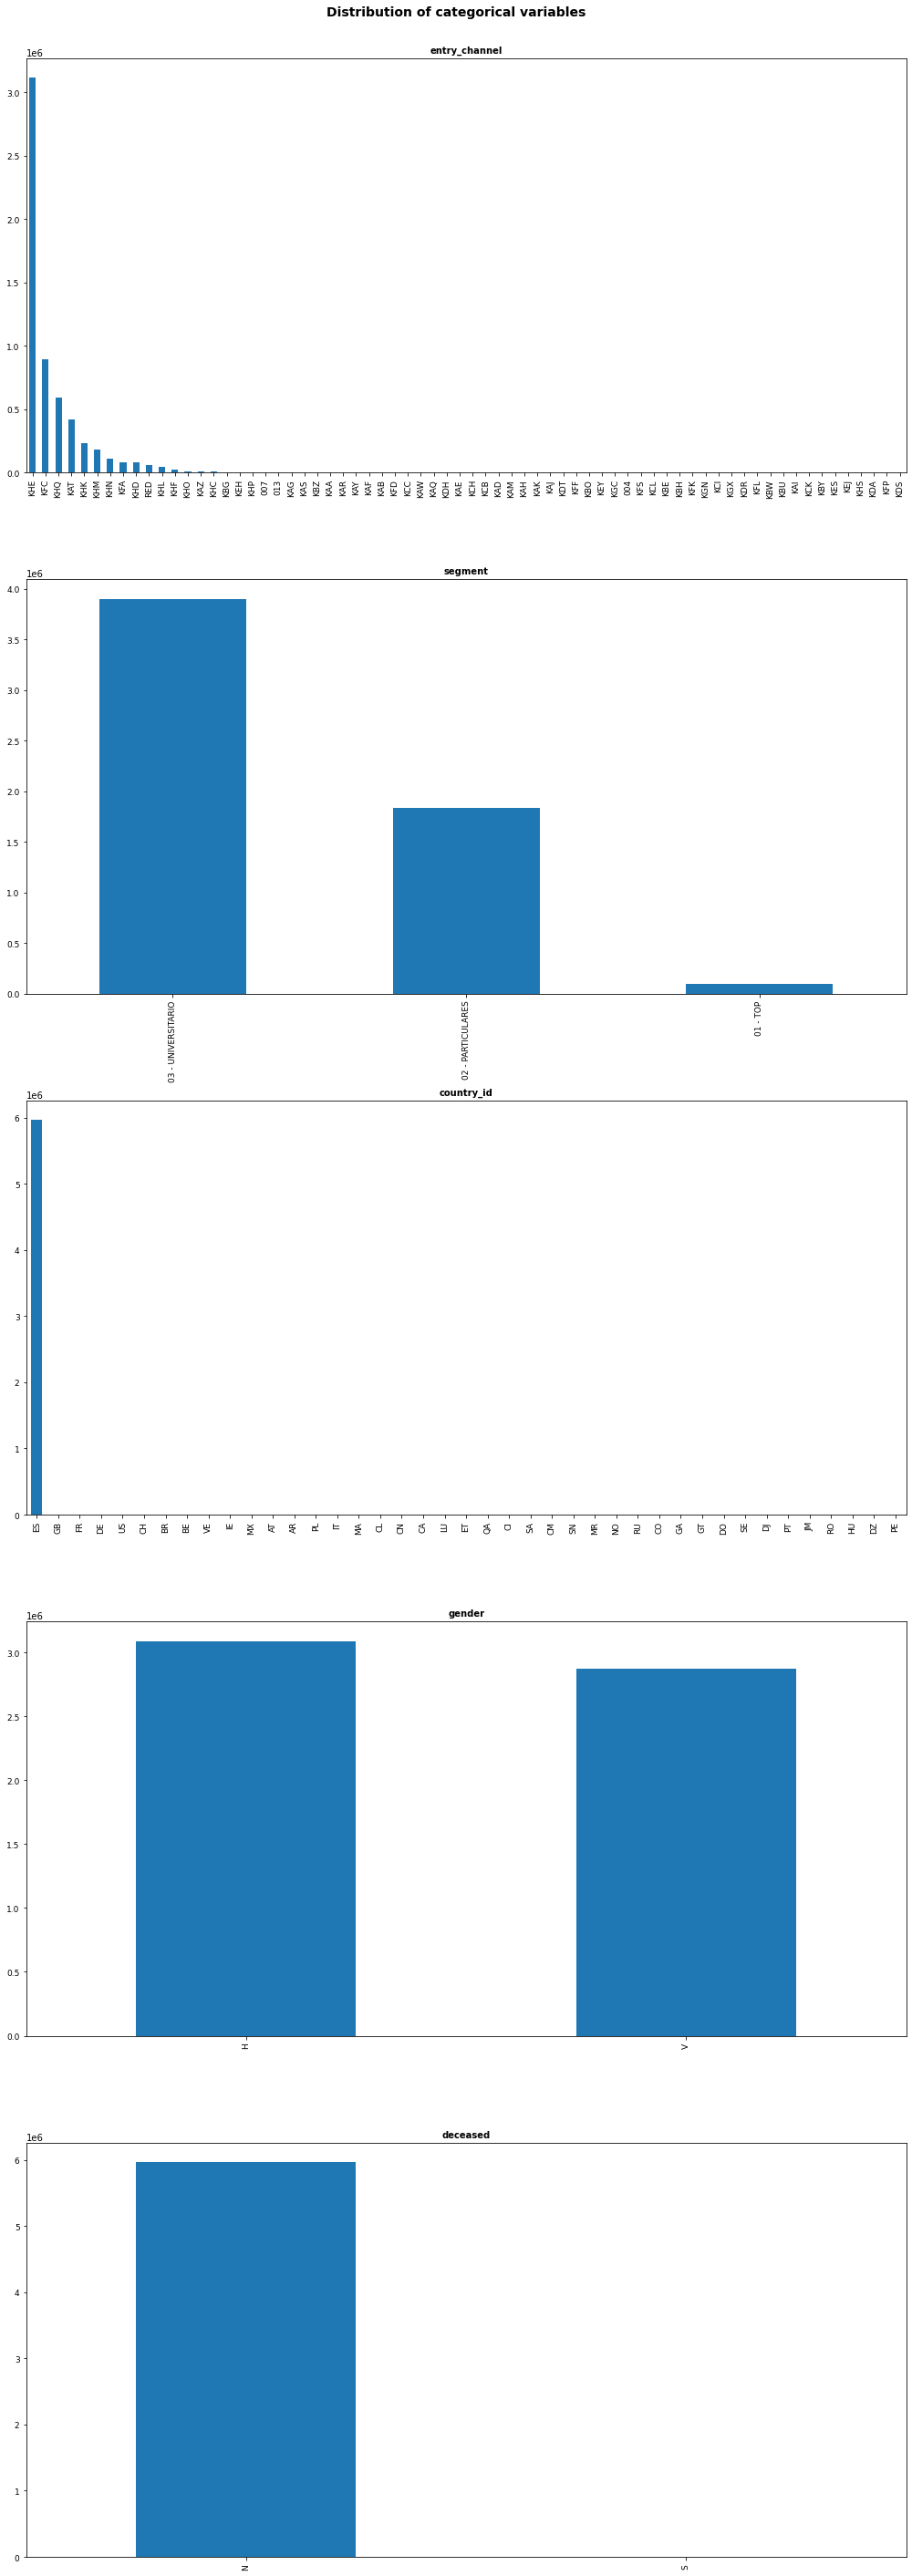

In [18]:
# First, understand what are the features that should be transformed
# ======================================================================================
columns_to_ignore = ['pk_partition','entry_date']

fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 40))
axes = axes.flat
columnas_object = [col for col in df.select_dtypes(include=['object']).columns if col not in columns_to_ignore]

for i, col in enumerate(columnas_object):
    df[col].value_counts().plot.bar(ax = axes[i])
    axes[i].set_title(col, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 9)
    axes[i].set_xlabel("")
    
fig.tight_layout()
plt.subplots_adjust(top=0.96)
fig.suptitle('Distribution of categorical variables',
             fontsize = 14, fontweight = "bold");

### 2.1.4. Descriptive statistics<a class="anchor" id="descriptive_statistics"></a>

In [19]:
# descriptive statistics for numerical values
# ======================================================================================
df.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
active_customer,"5,962,924.00",0.40,0.49,0.00,0.00,0.00,1.00,1.00
short_term_deposit,"5,962,924.00",0.00,0.05,0.00,0.00,0.00,0.00,1.00
loans,"5,962,924.00",0.00,0.01,0.00,0.00,0.00,0.00,1.00
mortgage,"5,962,924.00",0.00,0.01,0.00,0.00,0.00,0.00,1.00
funds,"5,962,924.00",0.00,0.06,0.00,0.00,0.00,0.00,1.00
securities,"5,962,924.00",0.00,0.06,0.00,0.00,0.00,0.00,1.00
long_term_deposit,"5,962,924.00",0.02,0.13,0.00,0.00,0.00,0.00,1.00
em_account_pp,"5,962,924.00",0.00,0.00,0.00,0.00,0.00,0.00,0.00
credit_card,"5,962,924.00",0.01,0.11,0.00,0.00,0.00,0.00,1.00
payroll,"5,962,863.00",0.03,0.18,0.00,0.00,0.00,0.00,1.00


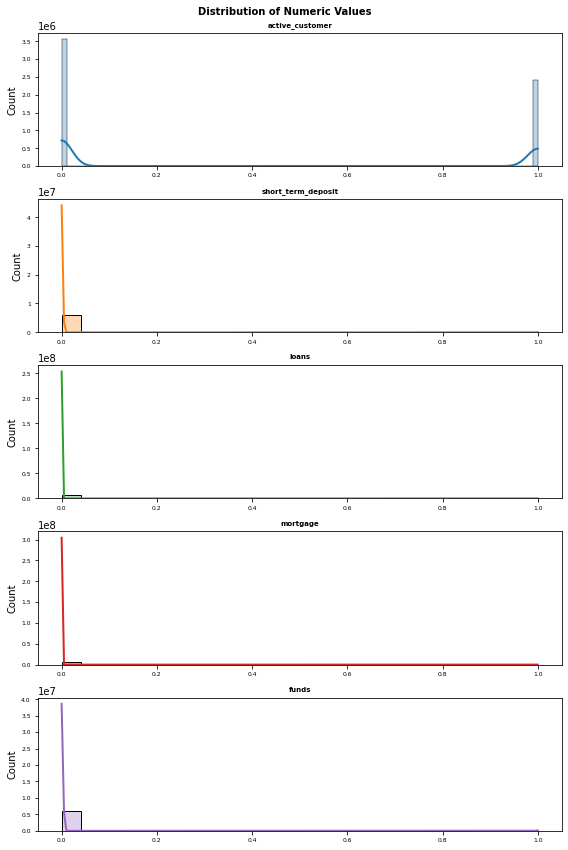

In [33]:
# Distribution of Numeric Values
# ======================================================================================
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))
axes = axes.flat
numeric_col = df.select_dtypes(include=[np.number]).columns

for i, col in enumerate(numeric_col[:5]):
    sns.histplot(
        data    = df,
        x       = col,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    # axes[i].set_xscale('log')

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribution of Numeric Values', fontsize = 10, fontweight = "bold");

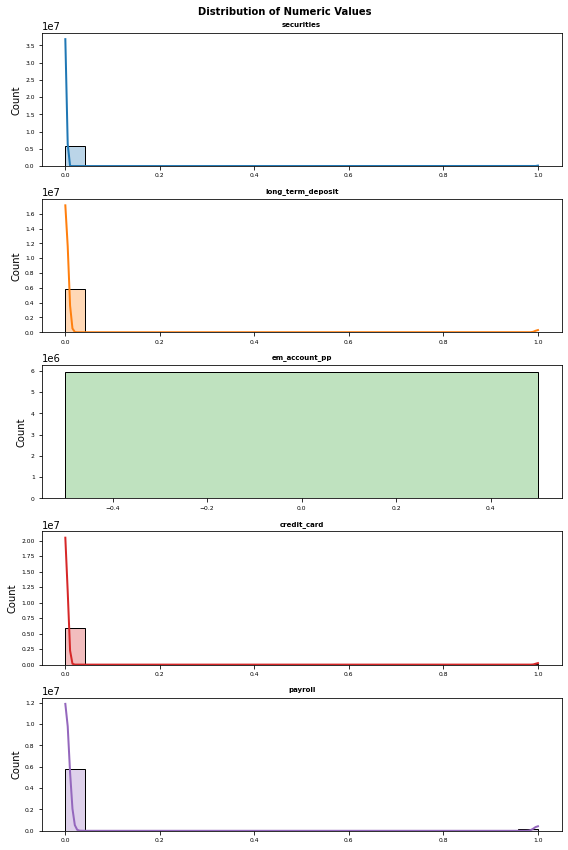

In [31]:
# Distribution of Numeric Values
# ======================================================================================
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))
axes = axes.flat
numeric_col = df.select_dtypes(include=[np.number]).columns

for i, col in enumerate(numeric_col[5:10]):
    sns.histplot(
        data    = df,
        x       = col,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    # axes[i].set_xscale('log')

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribution of Numeric Values', fontsize = 10, fontweight = "bold");

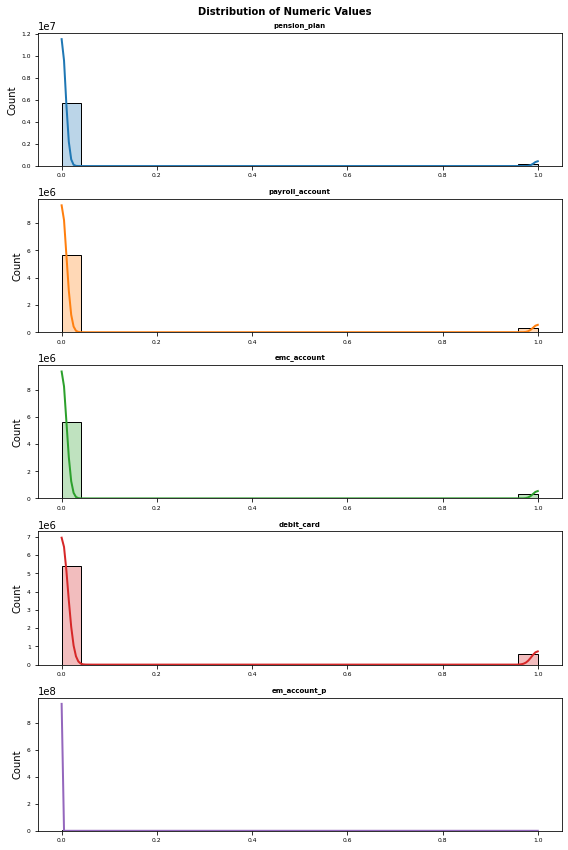

In [32]:
# Distribution of Numeric Values
# ======================================================================================
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))
axes = axes.flat
numeric_col = df.select_dtypes(include=[np.number]).columns

for i, col in enumerate(numeric_col[10:15]):
    sns.histplot(
        data    = df,
        x       = col,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    # axes[i].set_xscale('log')

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribution of Numeric Values', fontsize = 10, fontweight = "bold");

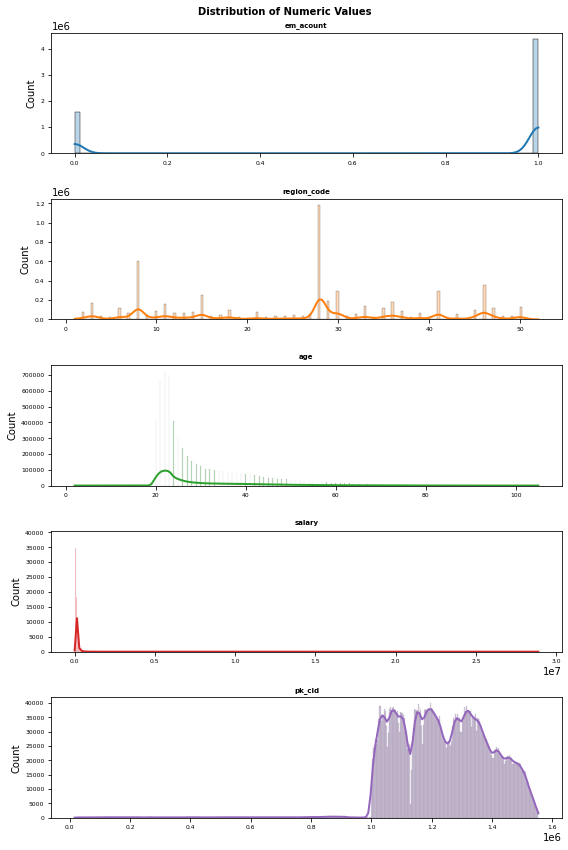

In [34]:
# Distribution of Numeric Values
# ======================================================================================
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 12))
axes = axes.flat
numeric_col = df.select_dtypes(include=[np.number]).columns

for i, col in enumerate(numeric_col[15:20]):
    sns.histplot(
        data    = df,
        x       = col,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    # axes[i].set_xscale('log')

fig.tight_layout()
plt.subplots_adjust(top = 0.95)
fig.suptitle('Distribution of Numeric Values', fontsize = 10, fontweight = "bold");

### 2.1.5. Number/fractions of null values<a class="anchor" id="null_values"></a>

In [38]:
# % of null values in our data set
# ==========================================================
for col in df.columns:
  total_values = len(df)
  missing_values = df[col].isna().sum().any()
  percentage = ((missing_values/total_values)*100).round(2)
  if missing_values != 0:
    print('Column {} with {} missing values, {}% of {} values'.format(col, missing_values, percentage, total_values))
else:
  print('There are no null values')

Column entry_channel with True missing values, 0.0% of 5962924 values
Column segment with True missing values, 0.0% of 5962924 values
Column payroll with True missing values, 0.0% of 5962924 values
Column pension_plan with True missing values, 0.0% of 5962924 values
Column region_code with True missing values, 0.0% of 5962924 values
Column gender with True missing values, 0.0% of 5962924 values
Column salary with True missing values, 0.0% of 5962924 values
There are no null values


### 2.1.7 Identification of Outliers<a class="anchor" id="identification_outliers"></a>

#### Numercial Values

In [ ]:
# Check if there are outliers in the data (numerical values)
# ======================================================================================
def Outliers(data):
    numerical_features = [col for col in df.select_dtypes(include=np.number).columns]
    for col in numerical_features:
        Q3 = np.quantile(data[col], 0.75)
        Q1 = np.quantile(data[col], 0.25)
        IQR = Q3 - Q1
        lower_range = Q1 - 1.5 * IQR
        upper_range = Q3 + 1.5 * IQR
        outliers_upper= len(data[data[col]>upper_range])
        outliers_lower= len(data[data[col]<lower_range])
        print("IQR value for column {} is: {} " .format(col, IQR))
        print("LOWER_RANGE value for column {}  is: {} " .format (col, lower_range))
        print("UPPER_RANGE value for column {}  is: {} ".format (col, upper_range))
        print("There are {} upper outliers for {} column ".format (outliers_upper, col))
        print('''There are {} lower outliers for  {} column 
        '''.format (outliers_lower, col))
        filtered_data = data[data[col] <= upper_range]
Outliers(df) 

IQR value for column index is: 4890659.75 
LOWER_RANGE value for column index  is: -4877198.875 
UPPER_RANGE value for column index  is: 14685440.125 
There are 0 upper outliers for index column 
There are 0 lower outliers for  index column 
        
IQR value for column Number of Services is: 97.0 
LOWER_RANGE value for column Number of Services  is: -124.5 
UPPER_RANGE value for column Number of Services  is: 263.5 
There are 12316 upper outliers for Number of Services column 
There are 0 lower outliers for  Number of Services column 
        
IQR value for column Number of Medicare Beneficiaries is: 58.0 
LOWER_RANGE value for column Number of Medicare Beneficiaries  is: -70.0 
UPPER_RANGE value for column Number of Medicare Beneficiaries  is: 162.0 
There are 10473 upper outliers for Number of Medicare Beneficiaries column 
There are 0 lower outliers for  Number of Medicare Beneficiaries column 
        
IQR value for column Number of Distinct Medicare Beneficiary/Per Day Services 

<ipython-input-40-b683029f6388>:14: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  axes[i].set_xscale('log')


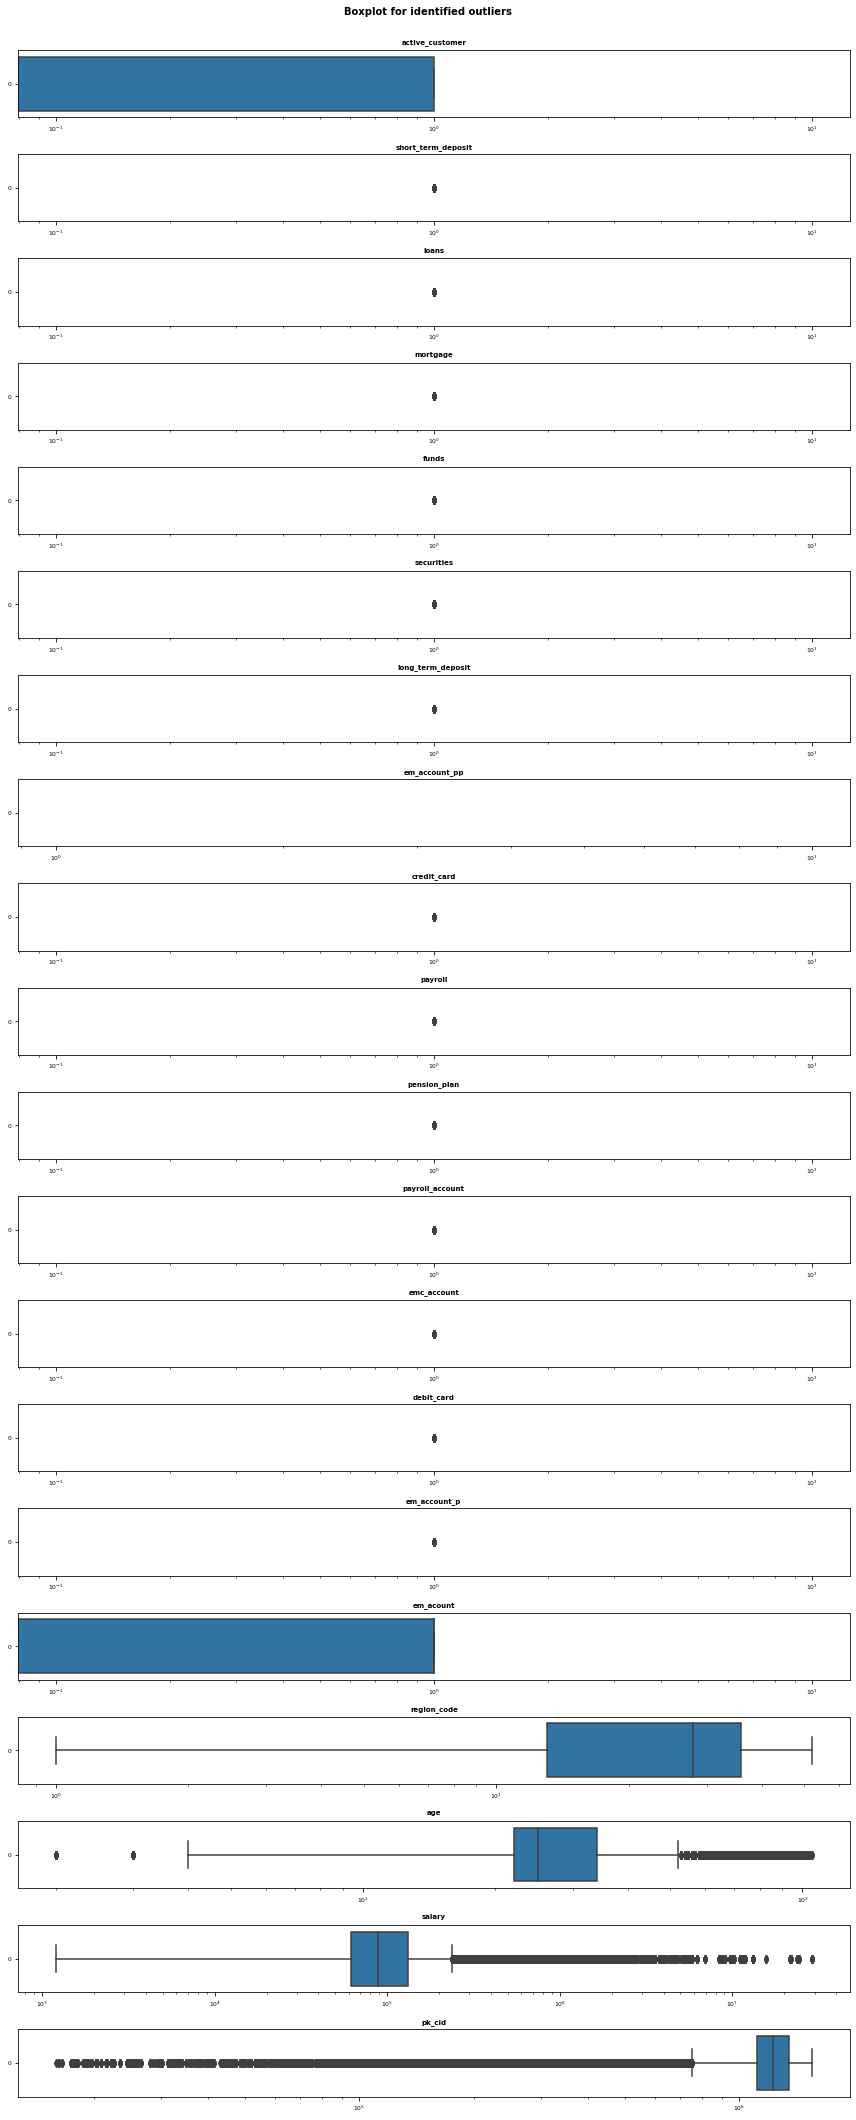

In [40]:
# Boxplot for columns with outliers
# ======================================================================================
cols_to_ignore = ['index','Place of Service','concat_code_description_bin','provider_type_bin','state_bin']
fig, axes = plt.subplots(nrows=20, ncols=1, figsize=(12, 30))
axes = axes.flat
col_out = [col for col in df.select_dtypes(include=np.number).columns if col not in cols_to_ignore]

for i, col in enumerate(col_out):
    sns.boxplot(data=df[col], 
                ax = axes[i], orient='h')
    axes[i].set_title(col, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_xscale('log')
    
fig.tight_layout()
plt.subplots_adjust(top=0.96)
fig.suptitle('Boxplot for identified outliers',
             fontsize = 10, fontweight = "bold");

#### Categorical Values

In [ ]:
# Understand the cardinality of the categorical features
# ======================================================================================
categorical_features = [col for col in df.select_dtypes(include=object).columns]

for col in categorical_features:
    print('\nFrequency of Categories for variable %s'%col)
    print(df[col].value_counts().sort_values(ascending=False))

## MLC2.2: Multivariate data analysis<a class="anchor" id="multivariate_data_analysis"></a>


### 2.2.1 Distribution of variables 2 to 2 (scatter plot) <a class="anchor" id="dist_num_var"></a>

### 2.2.2 Correlation Between Variables 2 to 2 (linear correlation) <a class="anchor" id="cor_num_var"></a>

### 2.2.3 Cross-tabs <a class="anchor" id="cross_tab"></a>

### 2.2.4 Correlation between combinations of variables and the class <a class="anchor" id="corr_comb"></a>

In [ ]:
# Correlation
# ======================================================================

correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, 
            annot = True, 
            cmap = sns.diverging_palette(20, 220, n=200), 
            center=0.05)

## MLC3: Data Preparation<a class="anchor" id="data_preparation"></a>
